# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

### Solution

The code makes use of a function _DataBlocking_, which implements the blocking method to compute statistical averages of a determined function of the random numbers produced by the generator and their uncertainties for increasing number of blocks. It receives in input the function which one wants to operate with on the produced numbers as a pointer to an abstract class _BaseFunction_, which only contains a virtual method taking a _double_ variable and returning another one, so that any function needed can be implemented in a derived class. This allows _DataBlocking_ to evaluate both the average of the random numbers $r$ (by simply using the identity function) and their variance, namely the average of $(r-1/2)^2$.

The function reads the random numbers from and writes the averages and errors into global _vector_ objects.

The total number of throws (random number generated) is set to $10^5$ and they are divided in $10^2$ blocks.

1. Below the plot of $\langle r \rangle -1/2$ as a function of the number of throws is reported. When few blocks are used to compute the average its value oscillates and the error is high. With increasing number of blocks the error decreases and the average levels off within little more than one standard deviation from the expected value of $1/2$.

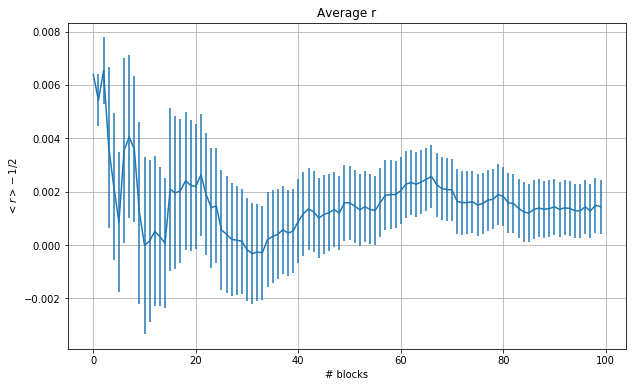

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

r=np.loadtxt("ave_r.out")

plt.figure(figsize=(10,6))
plt.errorbar(r[:,0], r[:,1], yerr=r[:,2])
plt.title('Average r')
plt.xlabel('# blocks')
plt.ylabel('$<r>-1/2$')
plt.grid(True)
plt.show()

2. The same observations apply to the plot of the variance ($\sigma^2-1/12$), whose final value is found within one standard deviation from the expected $1/12$.

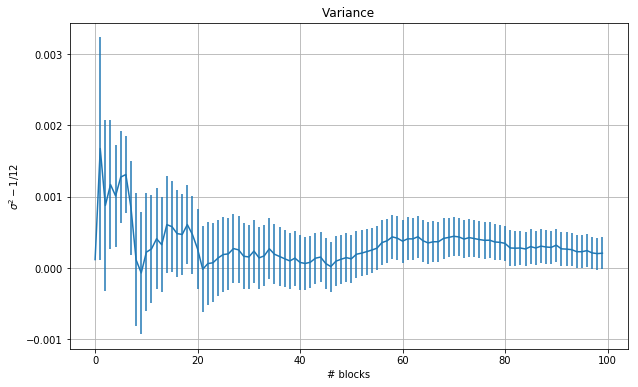

In [2]:
sigma=np.loadtxt("var_r.out")

plt.figure(figsize=(10,6))
plt.errorbar(sigma[:,0], sigma[:,1], yerr=sigma[:,2])
plt.title('Variance')
plt.xlabel('# blocks')
plt.ylabel('$\sigma^2-1/12$')
plt.grid(True)
plt.show()

3. In the third part of <font face="Courier">ex01.1.cpp</font> the $\chi^2$ test is run dividing the interval $[0,1]$ into $M=100$ sub-intervals. The code searches the sub-interval in which each throw falls and increases the corresponding $n_i$, $i=1,...,100$, by $1$ (all $n_i$ are previously set to $0$). The $\chi^2$ is then evaluated using
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
This is repeated for $j=1,...,100$, where each $j$ labels a different set of $n=10^4$ random numbers on which the test is run. The resulting $\chi_j^2$ values are shown in the following image. They are all close to $100$, which suggests that the random numbers are uniformely distributed.

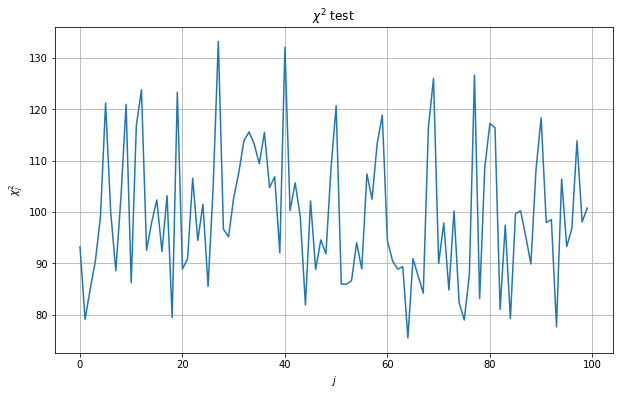

In [3]:
squarechi=np.loadtxt("square_chi.out")

plt.figure(figsize=(10,6))
plt.plot(squarechi)
plt.title('$\chi^2$ test')
plt.xlabel('$j$')
plt.ylabel('$\chi^2_j$')
plt.grid(True)
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Solution

The methods _RanExp_ and _RanCauchy_, which implement the inversion of the cumulative distribution method for the exponential and the Cauchy-Lorentz distribution respectively, have been added to the class _Random_.

The following histograms show the distributions of the averages computed on $N=1,2,10,100$ numbers sampled from the three different distributions. As expected the uniform and the exponential distributions converge to a gaussian curve for high $N$, according to the central limit theorem, while the Cauchy-Lorentz distribution remains a Cauchy-Lorentz distribution, being a stable distribution itself. The corresponding fit curves are also plotted.

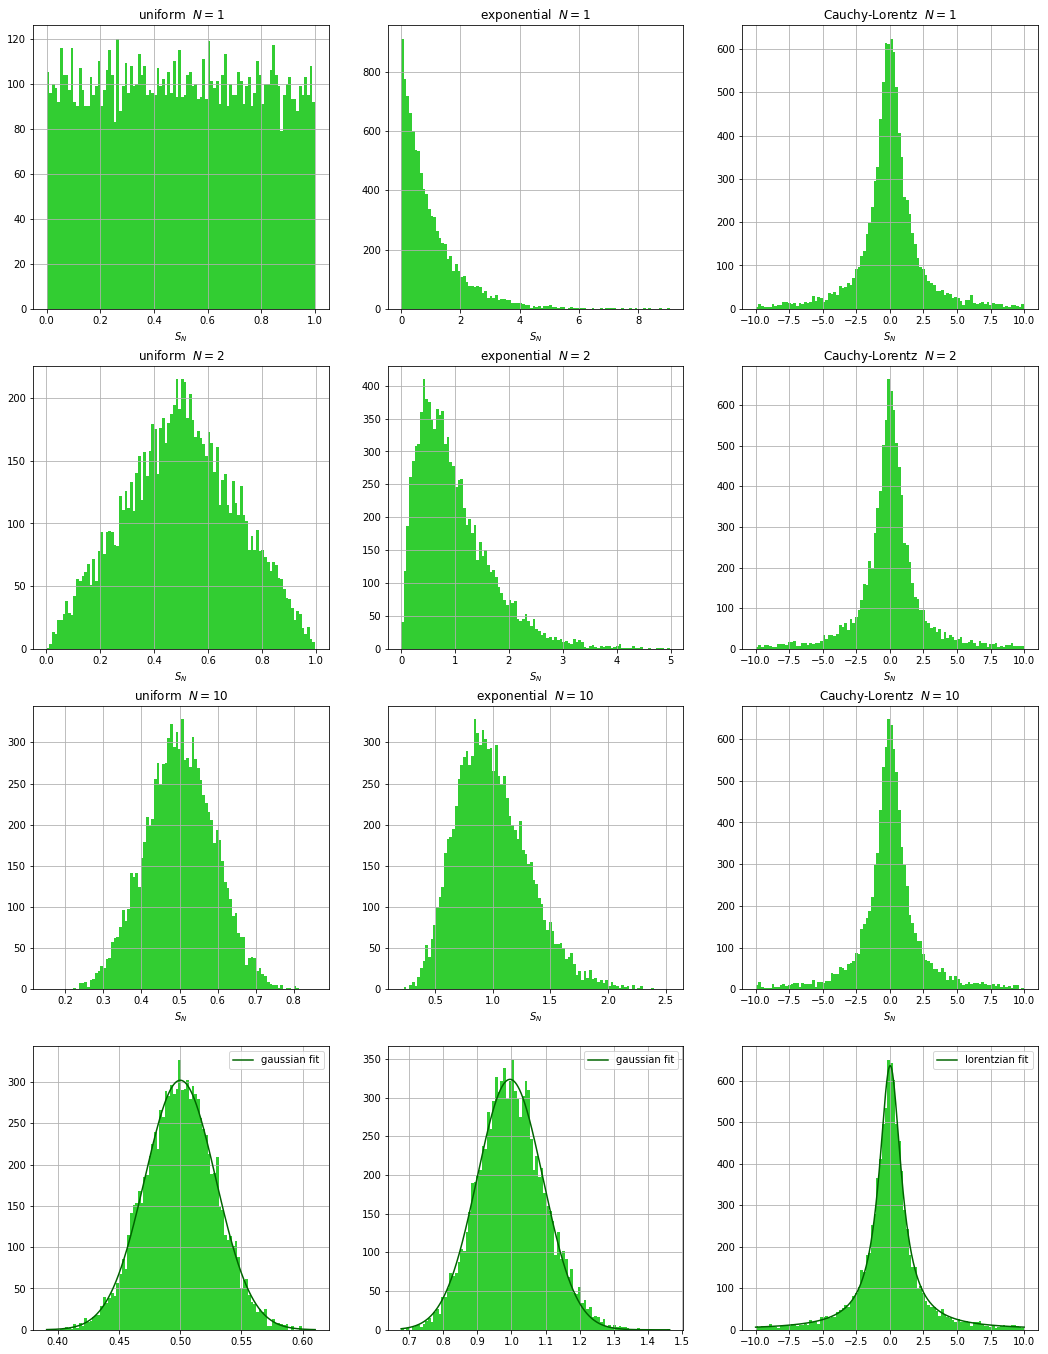

In [4]:
from scipy.optimize import curve_fit
from math import pi

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def lorentz(x,a,x0,gamma):
    return a/pi*gamma/((x-x0)**2+gamma**2)

N=[1,2,10,100]
dist=["uniform", "exponential", "Cauchy-Lorentz"]

#Load data from files
reg_dice=np.loadtxt("reg_dice.out")
exp_dice=np.loadtxt("exp_dice.out")
cauchy_dice=np.loadtxt("cauchy_dice.out")

fig, ax = plt.subplots(4, 3, figsize=(18, 24))

#Plots for N=1,2,10
for i in range(3):
    ax[i,0].hist(reg_dice[:,i], bins=100, color='limegreen')
    ax[i,1].hist(exp_dice[:,i], bins=100, color='limegreen')
    ax[i,2].hist(cauchy_dice[:,i], bins=100, range=(-10,10), color='limegreen')
    for j in range(3):
        ax[i,j].grid()
        ax[i,j].set_xlabel("$S_N$")
        ax[i,j].set_title(dist[j]+"  $N=$"+str(N[i]))
        
##Plots with fits for N=100
bin_heights, bin_borders, _ = ax[3,0].hist(reg_dice[:,3], bins=100, color='limegreen')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaus, bin_centers, bin_heights, p0=[300, 0.5, 0.05])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax[3,0].plot(x_interval_for_fit, gaus(x_interval_for_fit, *popt), label='gaussian fit', color='darkgreen')
ax[3,0].grid()
ax[3,0].legend()

bin_heights, bin_borders, _ = ax[3,1].hist(exp_dice[:,3], bins=100, color='limegreen')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaus, bin_centers, bin_heights, p0=[300, 1, 0.1])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax[3,1].plot(x_interval_for_fit, gaus(x_interval_for_fit, *popt), label='gaussian fit', color='darkgreen')
ax[3,1].grid()
ax[3,1].legend()

bin_heights, bin_borders, _ = ax[3,2].hist(cauchy_dice[:,3], bins=100, range=(-10,10), color='limegreen')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(lorentz, bin_centers, bin_heights, p0=[2000, 0, 1])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax[3,2].plot(x_interval_for_fit, lorentz(x_interval_for_fit, *popt), label='lorentzian fit', color='darkgreen')
ax[3,2].grid()
ax[3,2].legend()

plt.show()

### Exercise 01.3
- **Simulate** the Buffonâ€™s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Solution

The problem is invariant for translations and inversion in the y-direction (assuming that the lines are parallel to the y-axis) and for discrete translations of $nd$, with $n \in Z$, along the x-direction. For this reason to simulate one throw of the needle it is sufficent to generate a couple of random numbers, $x$ and $\theta$, uniformely distributed in $[0,d]$ and $[0,\pi]$ respectively, which represent the x-coordinate of one end of the needle and the angle formed with the x-axis.

After generating $10^6$ of such couples, the code uses a function called _buffon_, which "counts" the throw as a hit (returning $1$) if the needle intersects a line (otherwise it returns $0$). The function _DataBlocking_ of exercise 01.1 has been slightly modified into _DataBlockingPi_, which accumulates the outcomes of _buffon_ within $N=100$ different blocks (each with $N_{throws}=10^4$) into $N_{hit}$ and computes an estimate of $\pi$ for each block with
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
These estimates are then processed as usual to compute the blocking averages and errors as a function of the number of blocks, as shown in the picture. The result is compatible with the exact value of $\pi$ when using a high enough ($>10$) number of blocks.

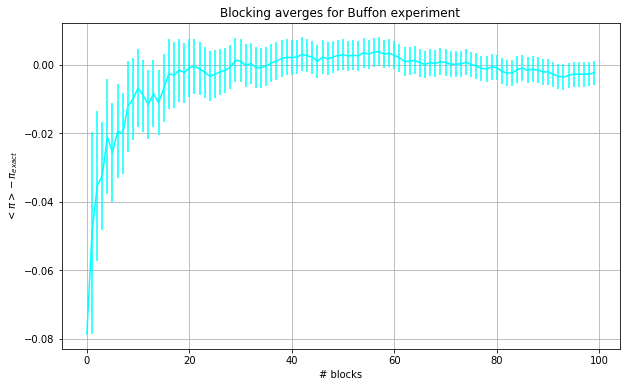

In [5]:
from math import pi

my_pi=np.loadtxt("pi.out")

plt.figure(figsize=(10,6))
plt.errorbar(my_pi[:,0], my_pi[:,1]-pi, yerr=my_pi[:,2], color='cyan')
plt.title('Blocking averges for Buffon experiment')
plt.xlabel('# blocks')
plt.ylabel('$<\pi>-\pi_{exact}$')
plt.grid(True)
plt.show()

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?